In [541]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 



In [542]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [543]:
df.size

61320

In [544]:
df.info

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [545]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [546]:
df.describe

<bound method NDFrame.describe of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urba

condition for dates
convert the age in fraction OR
Give description

In [547]:
df.isna() .sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [548]:
df. shape

(5110, 12)

In [549]:
df.nunique

<bound method DataFrame.nunique of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urb

In [550]:
df.duplicated().sum()

np.int64(0)

#The DF is clean the only thing that needs to be cleaned is the BMI missing values
#I wil be using the median to fill the 201 missing values.


In [551]:
df["bmi"]=df["bmi"].fillna(df["bmi"].median())

#Here we can see we have filled the NA values with the median

In [552]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#By using univariate analysis will show us any outliers, skewed distributions, issues and so on. 

#We are using the three numeric values with a histogram it will show us the outliers, shape, clusters and so on.
 
#subplot will divide it into 1 row and 3 columns and give it a postion in the output. EX the age will be in postion one so 
#it will appear in first place. 


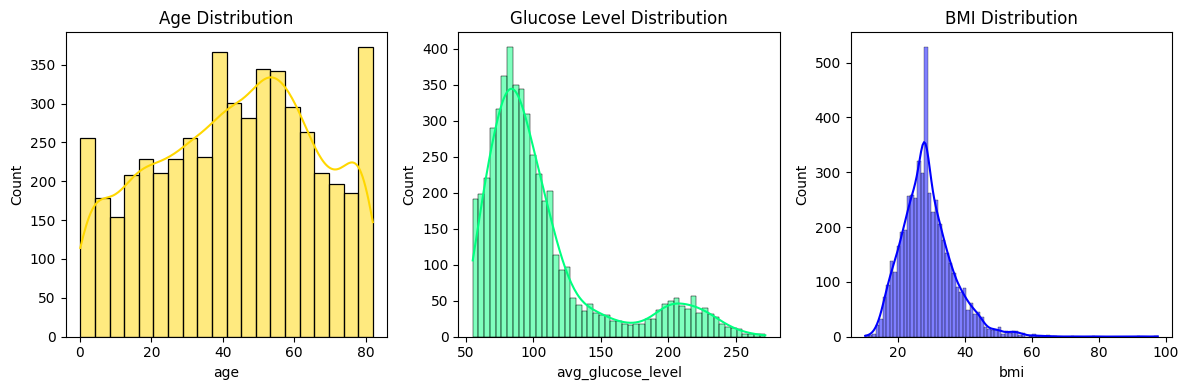

In [553]:
plt.figure(figsize=(12,4)) 
plt.subplot(1,3,1) 
sns.histplot(df['age'], kde=True, color=("gold"), edgecolor=("black")) 
plt.title('Age Distribution') 

plt.subplot(1,3,2) 
sns.histplot(df['avg_glucose_level'], kde=True, color=("springgreen"), edgecolor=("black")) 
plt.title('Glucose Level Distribution') 

plt.subplot(1,3,3) 
sns.histplot(df['bmi'], kde=True, color=("blue"), edgecolor=("black")) 
plt.title('BMI Distribution') 
plt.tight_layout() 


#younger folks are less likely to have a stroke
#right skewed more older adults liely to have a stroke
#40-60 years of age we see a high density 
#
#Gulucose level high density in 80 to 100 which would be normal 
#the higher gulucose level might be a factor in having a stroke

#25-30 bmi has a very high point showing high bmi numbers normal range is 18 to 25
#right skew shows some have very high bmi

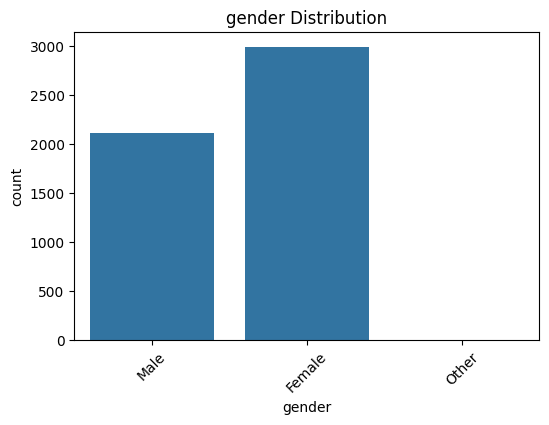

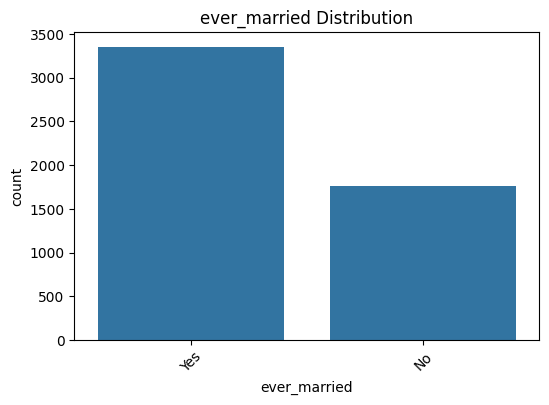

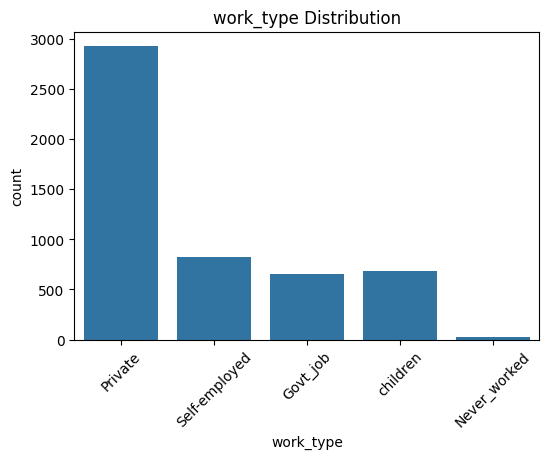

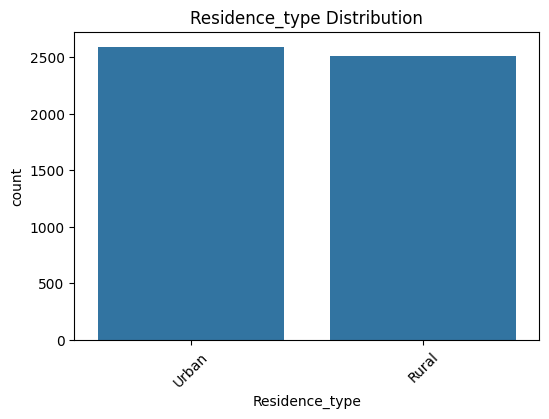

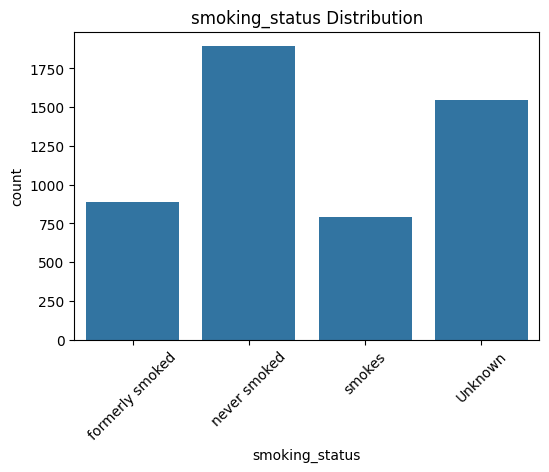

In [554]:
categorical_cols = ['gender','ever_married','work_type','Residence_type','smoking_status'] 
for col in categorical_cols: 
    plt.figure(figsize=(6,4)) 
    sns.countplot(data=df, x=col) 
    plt.title(f'{col} Distribution') 
    plt.xticks(rotation=45) 

#I have more female than man. It is something to take into account when comparing down the line. 

<Axes: xlabel='gender'>

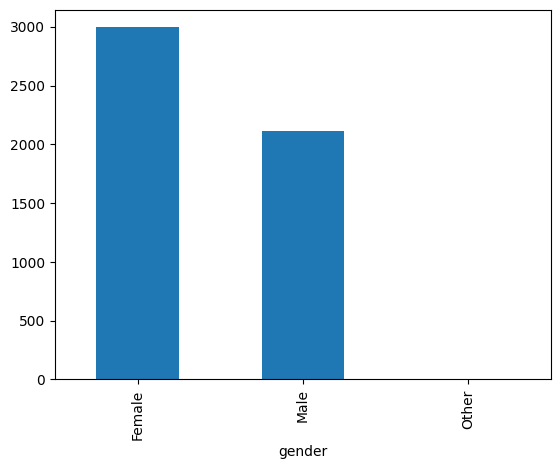

In [555]:
df['gender'].value_counts().plot(kind='bar')


In [556]:
df. dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Univariate Analysis, I will explore gender','ever_married','work_type','Residence_type','smoking_status one by one. 

<Axes: xlabel='smoking_status'>

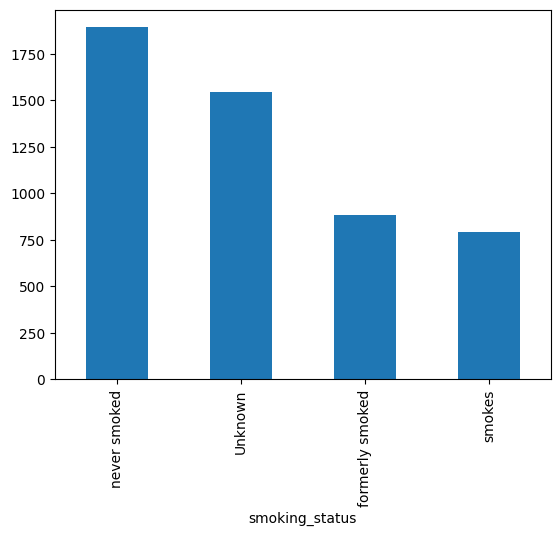

In [557]:
df["smoking_status"].value_counts().plot(kind="bar")


<Axes: xlabel='ever_married'>

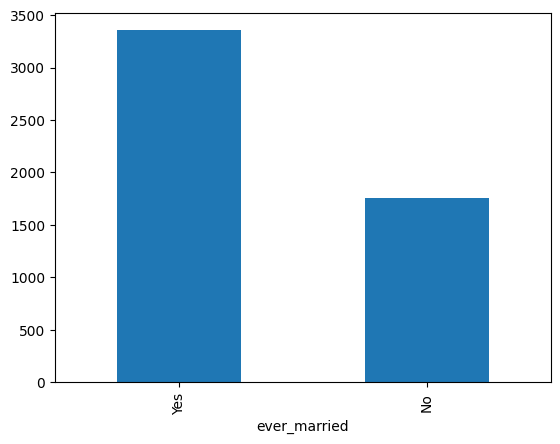

In [558]:
df["ever_married"].value_counts().plot(kind="bar")

#work type for private work has close to 3000. The raw counts will be not for future comparision but %

<Axes: xlabel='work_type'>

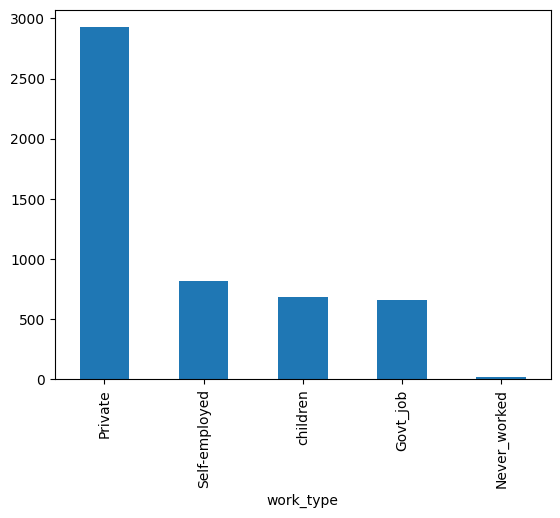

In [559]:
df["work_type"].value_counts().plot(kind="bar")

<Axes: xlabel='Residence_type'>

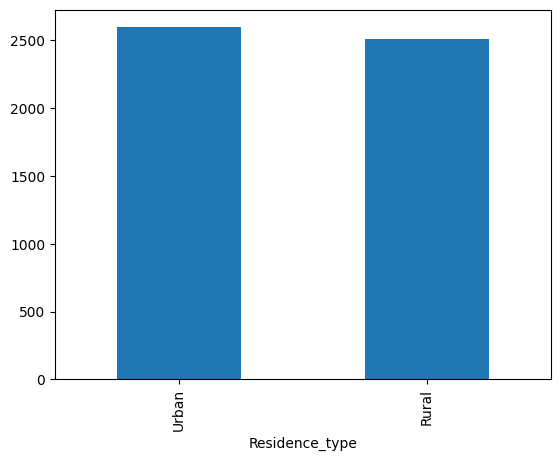

In [560]:
df["Residence_type"].value_counts().plot(kind="bar")

0=Never had a stroke
1=Had a stroke

#

In [561]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

.map lets us rename the 0 and 1 to whatever name given. To make it readable we will rename it to stroke and no stroke


<Axes: xlabel='stroke'>

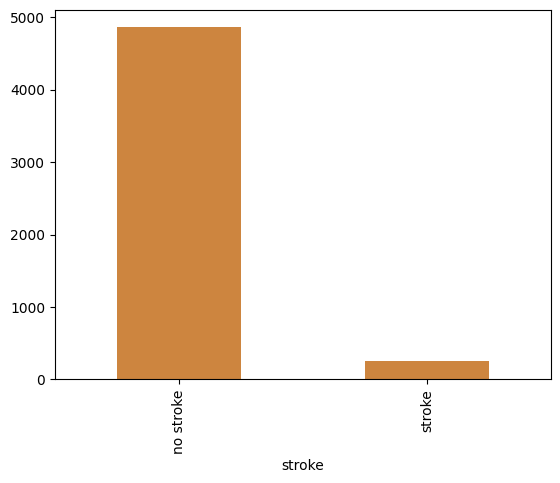

In [562]:
df["stroke"].map({0: "no stroke", 1: "stroke"}).value_counts().plot(kind="bar", color=("peru"))

Bivariate Analysis
Violin plot, countplot and box plot will compare one variable predictor with stroke. 


his will group the gender into 3 cat.
.mean will be the number of people that had a stroke then we converte it into % by *100

Text(0.5, 1.0, 'STROKE PERCENTAGE RATE BY GENDER')

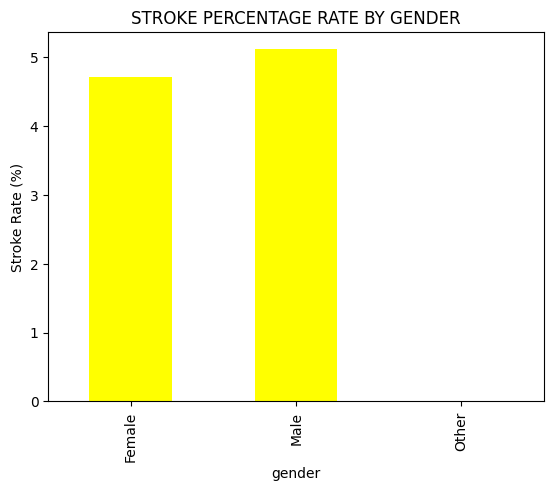

In [563]:
(df.groupby('gender')['stroke'].mean() * 100).plot(kind='bar',color=("yellow"))
plt.ylabel('Stroke Rate (%)') 
plt.title("STROKE PERCENTAGE RATE BY GENDER")

#We see heavy set of data in the age 60 t0 80 that had a stroke. Older age plays a role in having a stroke.
Those who do not have a stroke cover the eniter age group including kids. 
The median line for people with stroke is much higher.We do see some outliers that had strong at a younger age.  

Text(0, 0.5, 'AGE BY STROKE STATUS')

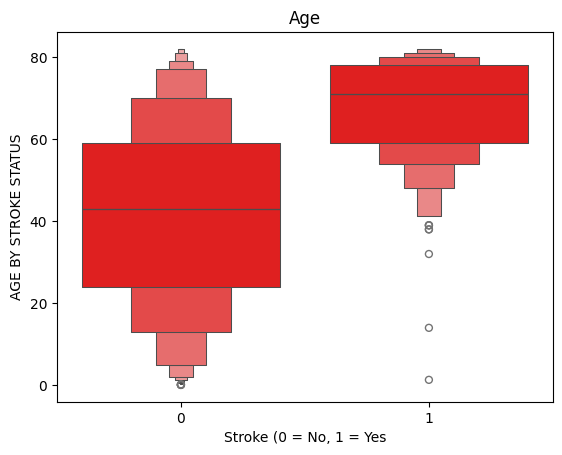

In [564]:
sns.boxenplot(data=df, x="stroke", y="age", color="red")
plt.title("Age")
plt.xlabel("Stroke (0 = No, 1 = Yes") 
plt.ylabel("AGE BY STROKE STATUS")




#People with strokes shows them having a higher level of gulucose.
#lower lovel of gulucose is shown in those that do not have a stroke.
#cluster 50 to 120 gulucose level for those with no strokes.

Text(0, 0.5, 'GULUCOSE LEVEL')

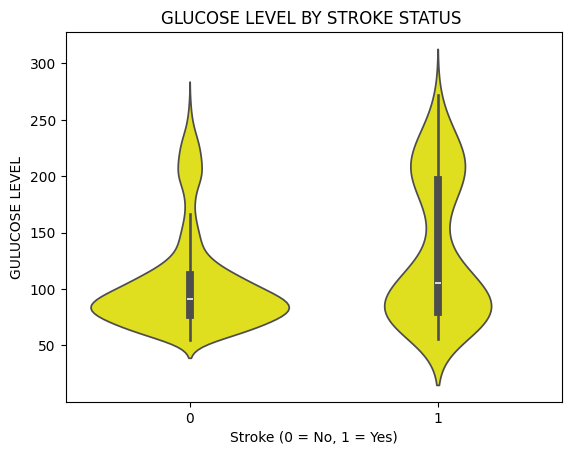

In [565]:
sns.violinplot(data=df, x="stroke", y="avg_glucose_level", color="yellow")
plt.xlabel('Stroke (0 = No, 1 = Yes)') 
plt.title("GLUCOSE LEVEL BY STROKE STATUS ")
plt.ylabel("GULUCOSE LEVEL")

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

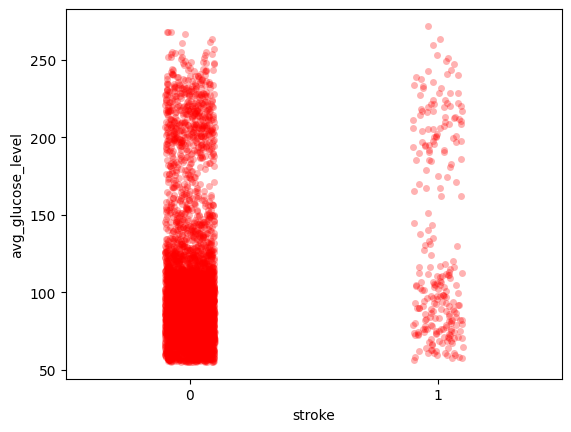

In [566]:
sns.stripplot(data=df, x="stroke", y="avg_glucose_level", color="red", alpha=0.3)

Text(0, 0.5, 'GULUCOSE LEVEL')

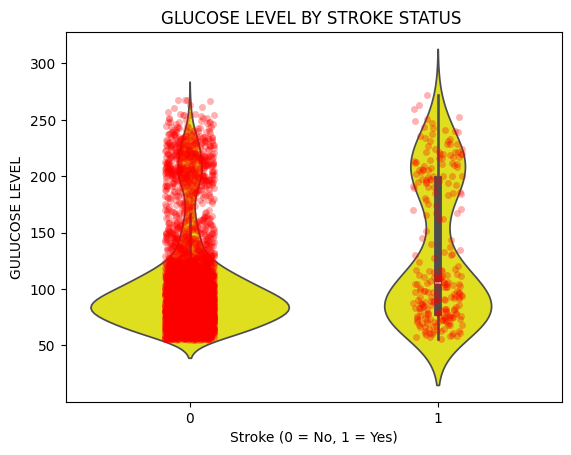

In [567]:
sns.violinplot(data=df, x="stroke", y="avg_glucose_level", color="yellow")
sns.stripplot(data=df, x="stroke", y="avg_glucose_level", color="red", alpha=0.3)
plt.xlabel('Stroke (0 = No, 1 = Yes)') 
plt.title("GLUCOSE LEVEL BY STROKE STATUS ")
plt.ylabel("GULUCOSE LEVEL")


In [568]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Here is what BMI range looks like. This range was found on the web, none was provided by the data. 

UNDERWEIGHT = 0 to <18.5 

NORMAL RANGE = 18.5 to <25 

OVERWEIGHT = 25 to <30 

OBESITY LEVEL 1 =  30 to <35 

OBESITY LEVEL 2=  35 to <40 

OBESITY LEVEL 3 = 40 to 100 

The bins have the BMI ranges as shown on top. 

The Bmi distribution shows right skewed into the "Overweight", "Obesity I", "Obesity II", "Obesity III" category.
We cant draw a strong relationship with stroke and high bmi. 

C:\Users\mrmik\AppData\Local\Temp\ipykernel_12256\2954964428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="bmi_category", palette="Set3")


Text(0, 0.5, 'Count')

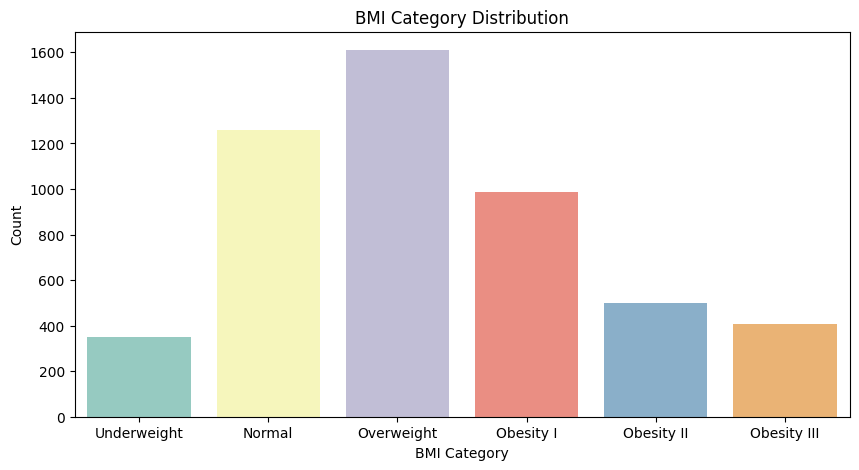

In [569]:
bins = [0, 18.5, 25, 30, 35, 40, 100] 
labels = ["Underweight", "Normal", "Overweight", "Obesity I", "Obesity II", "Obesity III"] 
df["bmi_category"] = pd.cut(df["bmi"], bins=bins, labels=labels) 
plt.figure(figsize=(10,5)) 
sns.countplot(data=df, x="bmi_category", palette="Set3") 
plt.title("BMI Category Distribution")
plt.xlabel("BMI Category") 
plt.ylabel("Count")

#The BMI median for stroke cases is lower and the no stroke cases the BMI median seems to be in the middle. 
stroke cases tend to have around the same BMI vs the BMI with no stroke is more spread out
BMI shows almost the same pattern with the stroke and none stroke people. 

Text(0.5, 1.0, 'BMI BY STROKE STATUS')

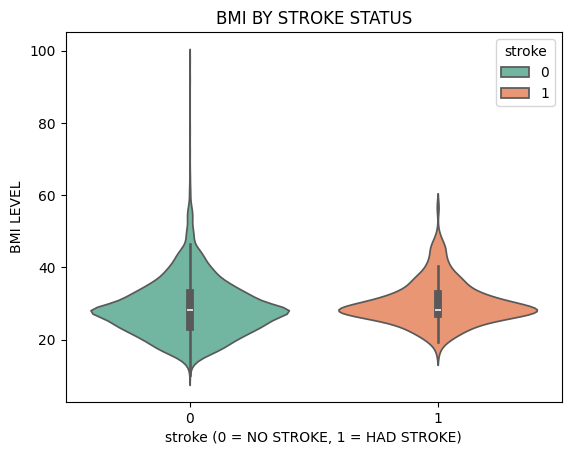

In [570]:
sns.violinplot(data=df, x="stroke", y="bmi", palette="Set2", hue="stroke") 
plt.xlabel('stroke (0 = NO STROKE, 1 = HAD STROKE)') 
plt.ylabel("BMI LEVEL") 
plt.title("BMI BY STROKE STATUS")

#categorical 

#Almost all of the people without hypertension had a stroke.
#The people with hypertension had a higher chance for a stroke.
#In this data we see only a few pople had hypertension but out of those having a stroke was higher in that group. 

Text(0.5, 1.0, 'HYPERTENSION VS STROKE')

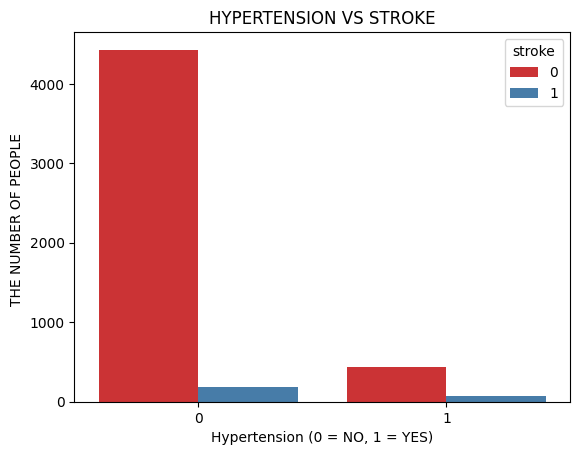

In [571]:
sns.countplot(data=df, x="hypertension", hue="stroke", palette="Set1") 
plt.xlabel("Hypertension (0 = NO, 1 = YES)") 
plt.ylabel("THE NUMBER OF PEOPLE ") 
plt.title("HYPERTENSION VS STROKE")



#Those who are married get more strokes than the once that arent married. 

Text(0.5, 1.0, 'MARRIED LEADS TO STROKE')

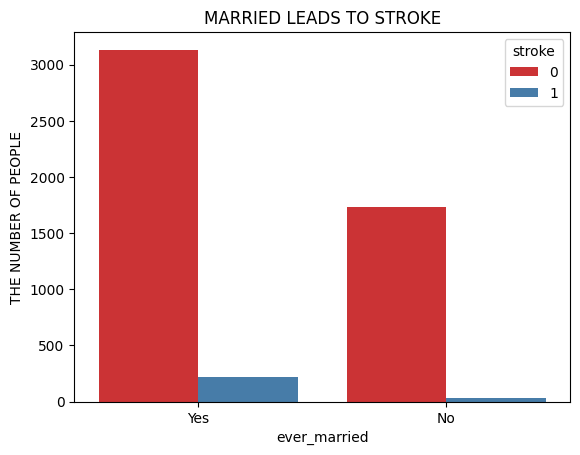

In [572]:
sns.countplot(data=df, x="ever_married", hue="stroke", palette="Set1")
plt.ylabel("THE NUMBER OF PEOPLE")
plt.title("MARRIED LEADS TO STROKE")

Multivariate Analysis 
The three variables I looked at are martial status, age and stroke. It shows that martial status is not a factor in stroke.
Age is a strong factor in stroke cases. 

Text(0, 0.5, 'AGE')

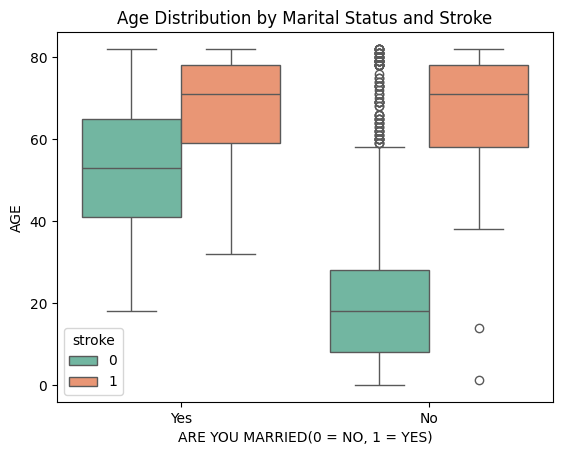

In [573]:
sns.boxplot(data=df, x="ever_married", y="age", hue="stroke", palette="Set2")
plt.title("Age Distribution by Marital Status and Stroke")
plt.xlabel("ARE YOU MARRIED(0 = NO, 1 = YES)") 
plt.ylabel("AGE")

Text(0.5, 0, 'DO YOU SMOKE?(0=NO, 1=YES)')

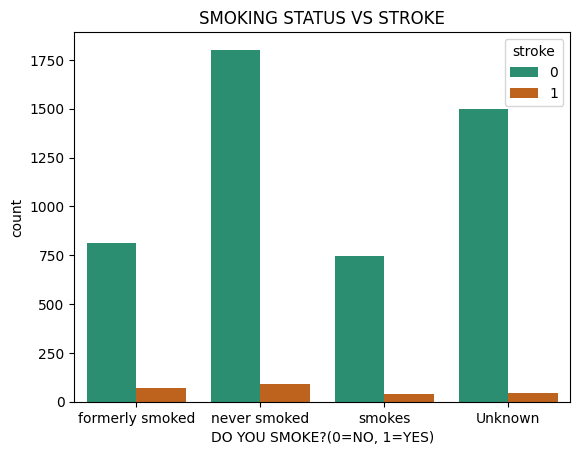

In [574]:
sns.countplot(data=df, x="smoking_status", hue="stroke", palette="Dark2")
plt.title("SMOKING STATUS VS STROKE")
plt.xlabel("DO YOU SMOKE?(0=NO, 1=YES)")


In [575]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity II
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesity I
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesity I
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal


#Heart disease shows a high correlation with having a stroke. In our dataset most people do not have a heart disease.
However, those that do show a higher number of people with stroke. The people who do not have heart disease show less
number of strokes amongst them. 

Text(0.5, 1.0, 'HEART DISEASE CORRELATION WITH STROKE ')

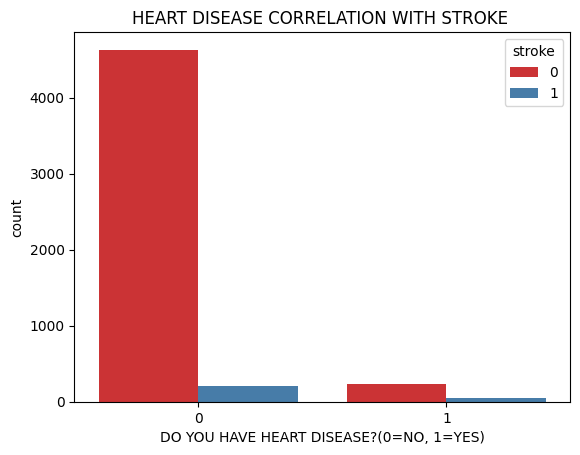

In [576]:
sns.countplot(data=df, x="heart_disease", hue="stroke", palette="Set1")
plt.xlabel("DO YOU HAVE HEART DISEASE?(0=NO, 1=YES)")
plt.title("HEART DISEASE CORRELATION WITH STROKE ")

The other category does not prdoduce any further insight. Gender does not show a very strong correlation with having a strong. 
Both Female and Male seem to have the same amount of case. 

Text(0.5, 0, 'GENDER CORRELATION WITH STROKE')

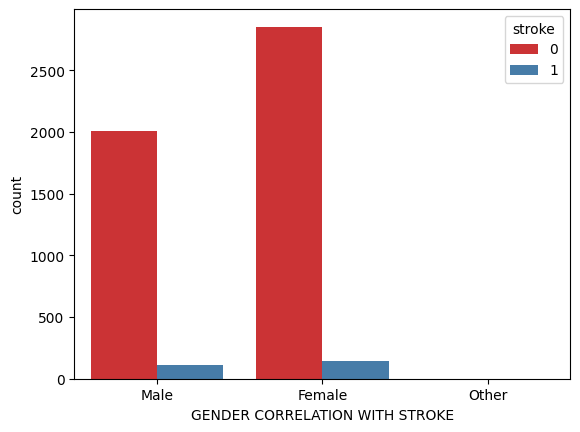

In [577]:
sns.countplot(data=df, x="gender", hue="stroke", palette="Set1")
plt.xlabel("GENDER CORRELATION WITH STROKE")


Text(0.5, 1.0, 'RESIDENCE CORRELATION WITH STROKE')

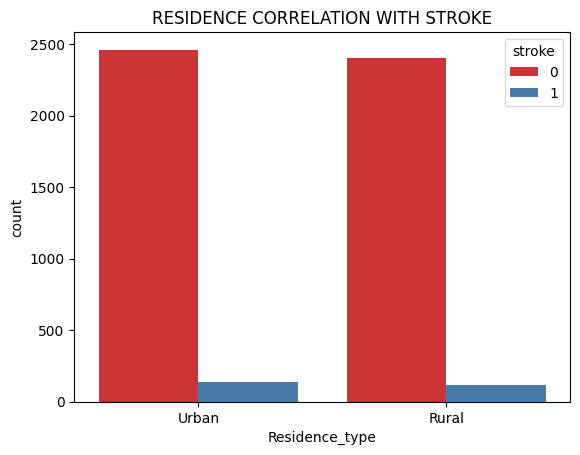

In [578]:
sns.countplot(data=df, x="Residence_type", hue="stroke", palette="Set1")
plt.title("RESIDENCE CORRELATION WITH STROKE")

Work type seems to not have correlation with stroke. The data shows a high number of people that are in the private category. Therefore, we see more cases of strokes. Across the work type it is very similar output for stroke cases except the “never worked” category. That category shows very little to see if any correlation does exist.  

Text(0.5, 1.0, 'CORRELATION BETWEEN WORK TYPE AND STROKE')

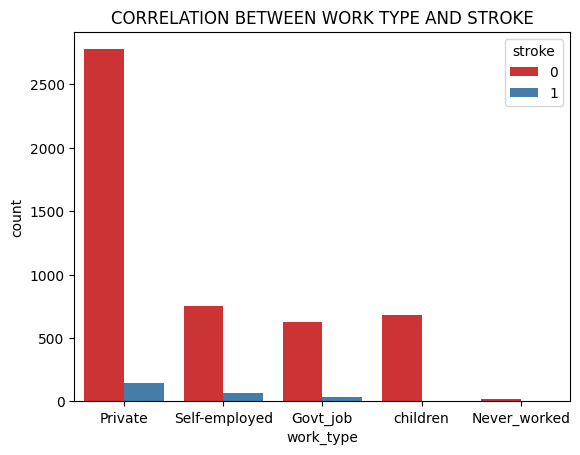

In [579]:
sns.countplot(data=df, x="work_type", hue="stroke", palette="Set1")
plt.title("CORRELATION BETWEEN WORK TYPE AND STROKE")



The Correlation heatmap shows the relationship between num values. 
The strong predictors are age, glucose level, hypertension, and heart disease. In the heatmap we see all positive correlation. The strongest being the age with .25. From the data we can conclude that all these predictors can raise your chances of stroke. 

Text(0.5, 1.0, 'Stroke CORRELATION BETWEEN STRONG PREDICTORS AND STROKE')

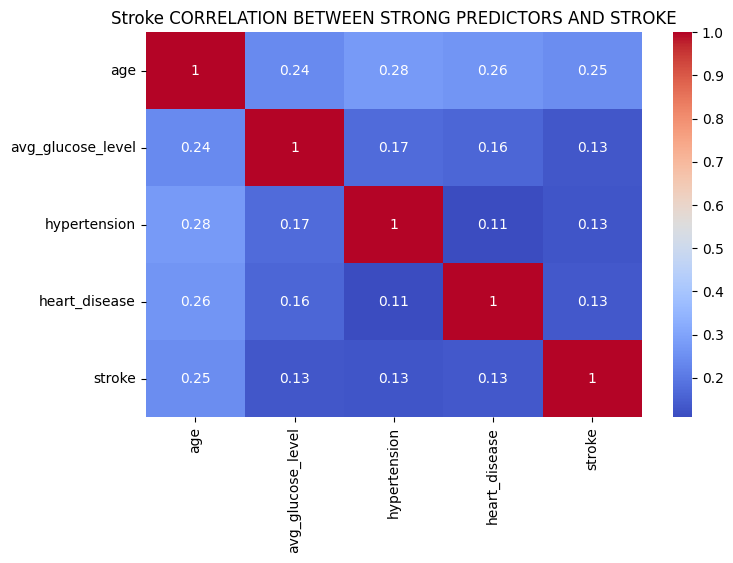

In [580]:

strong_correlation = ["age", "avg_glucose_level", "hypertension", "heart_disease", "stroke"] 
plt.figure(figsize=(8,5)) 
sns.heatmap(df[strong_correlation].corr(), cmap="coolwarm",annot=True) 
plt.title("Stroke CORRELATION BETWEEN STRONG PREDICTORS AND STROKE")

The strong predictors are age, glucose level, hypertension, and heart disease. Age analysis is the major predictor with stroke cases. Health factors like glucose level, hypertension and heart shows us having good health reduces the risk of stroke.  

The univariate analysis painted a clear picture of age, BMI, work type, smokers, hypertension, and heart disease. Medical factors such as hypertension and heart disease contributed to stroke. The BMI result showed that most of the population was overweight and obese. However, it did not show a clear contribution with stroke. Both work type and residence were evenly distributed.  

Both multivariate and bivariate analysis showed me the difference between the stroke and the non stroke individuals in the data presented.  

Hypertension –Most Individuals with stroke had a case of hypertension.  

Glucose level -Data showed people with stroke had a higher glucose level. 

Age –Many of the data points were clustered as the age increased.  

Heart disease-People with heart disease had a higher chance for stroke  

Ever married, work type, residence, gender did not have strong correlation with stroke.